In [3]:
## Evolution of 3P impact on NBA game
import pandas as pd

In [4]:
df = pd.read_csv('nba_player_performance_per_season_with_salaries.csv')
df

,Unnamed: 0,PLAYER_ID,RANK,PLAYER,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,career_WS,career_eFG%,draft_year,height,name,position,weight,salary,season_end,season_start
0,0,893,1,Michael Jordan,82,3144,837,1625,0.515,9,...,214.0,50.9,1984.0,6-6,Michael Jordan,Small Forward and Shooting Guard,195lb,550000.0,1985.0,1984.0
1,1,78615,14,Orlando Woolridge,77,2816,679,1225,0.554,0,...,53.0,51.4,1981.0,6-9,Orlando Woolridge,Small Forward,215lb,300000.0,1985.0,1984.0
2,2,76497,49,Quintin Dailey,79,2101,525,1111,0.473,7,...,12.7,45.6,1982.0,6-3,Quintin Dailey,Shooting Guard,180lb,410000.0,1985.0,1984.0
3,3,77134,116,Steve Johnson,74,1659,281,516,0.545,0,...,26.9,57.2,1981.0,6-10,Steve Johnson,Center,235lb,369000.0,1985.0,1984.0
4,4,76453,126,Dave Corzine,82,2062,276,568,0.486,0,...,37.3,48.5,1978.0,6-11,Dave Corzine,Center,250lb,660000.0,1985.0,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14501,14501,203524,453,Solomon Hill,12,187,11,41,0.268,4,...,9.2,46.7,2013.0,6-7,Solomon Hill,Small Forward,225lb,12236535.0,2018.0,2017.0
14502,14502,203580,479,Larry Drew II,10,70,7,24,0.292,3,...,-0.5,37.2,NaN,6-2,Larry Drew II,Point Guard,180lb,148318.0,2018.0,2017.0
14503,14503,1627215,479,Walt Lemon Jr.,5,35,7,16,0.438,1,...,0.0,45.1,NaN,6-3,Walt Lemon Jr.,Point Guard,180lb,92160.0,2018.0,2017.0
14504,14504,1628429,504,Charles Cooke,13,38,2,14,0.143,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df = df[~df['YEAR'].isin(['1986-87','1989-90'])]

In [44]:
df["main_position"] = df["position"].apply((lambda x: str(x).split(' and ')[0]))

<ipython-input-44-72c4e8fd5486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["main_position"] = df["position"].apply((lambda x: str(x).split(' and ')[0]))


In [46]:
df['main_position'].unique()

array(['Small Forward', 'Shooting Guard', 'Center', 'nan', 'Point Guard',
       'Power Forward'], dtype=object)

In [47]:
df['PTS_FROM_3P'] = df['FG3M'] * 3

<ipython-input-47-d82b72b071e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PTS_FROM_3P'] = df['FG3M'] * 3


In [48]:
df[['PTS','PTS_FROM_3P','PLAYER','YEAR']]

,PTS,PTS_FROM_3P,PLAYER,YEAR
0,2313,27,Michael Jordan,1984-85
1,1767,0,Orlando Woolridge,1984-85
2,1262,21,Quintin Dailey,1984-85
3,743,0,Steve Johnson,1984-85
4,701,0,Dave Corzine,1984-85
...,...,...,...,...
14501,29,12,Solomon Hill,2017-18
14502,17,9,Larry Drew II,2017-18
14503,17,3,Walt Lemon Jr.,2017-18
14504,6,3,Charles Cooke,2017-18


In [50]:

pts = df.groupby(['YEAR'])[['PTS_FROM_3P','PTS']].sum()
pts['PCT_3P_TOTAL'] = 100 * pts['PTS_FROM_3P'] / pts['PTS']
pts.reset_index(inplace=True)

In [51]:
from matplotlib import pyplot as plt

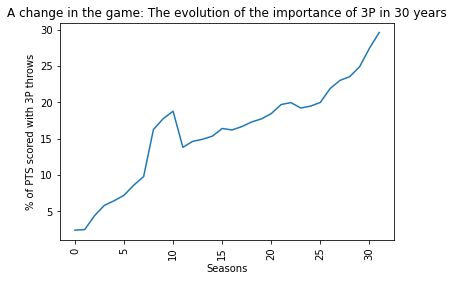

In [52]:
plt.plot(pts['PCT_3P_TOTAL'])
plt.title("A change in the game: The evolution of the importance of 3P in 30 years")
plt.xlabel("Seasons")
plt.ylabel("% of PTS scored with 3P throws")
plt.xticks(rotation=90)
plt.show()

In [59]:
valid_positions = [x for x in df['main_position'].unique() if x != 'nan']
valid_positions

['Small Forward', 'Shooting Guard', 'Center', 'Point Guard', 'Power Forward']

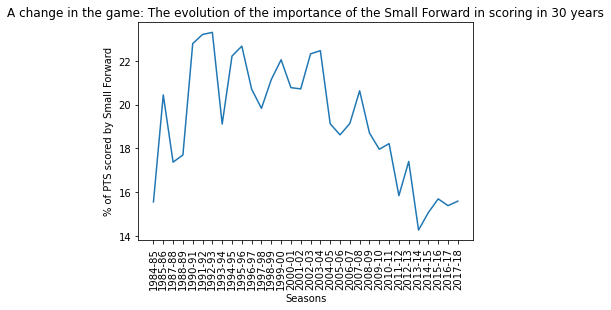

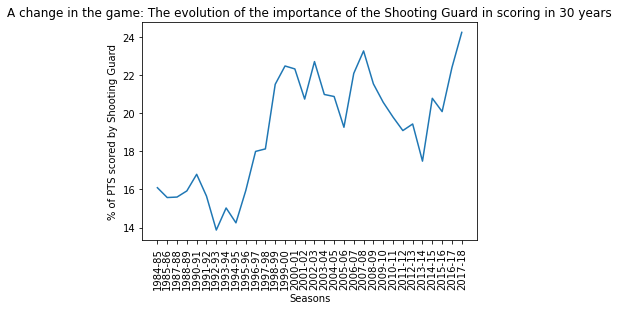

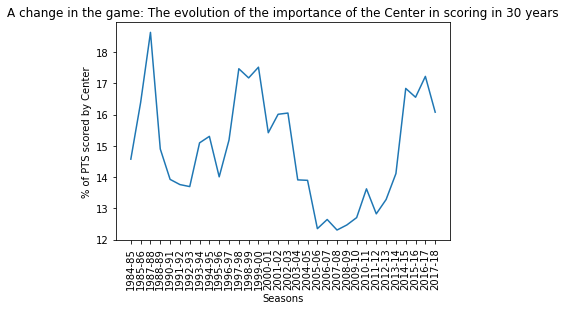

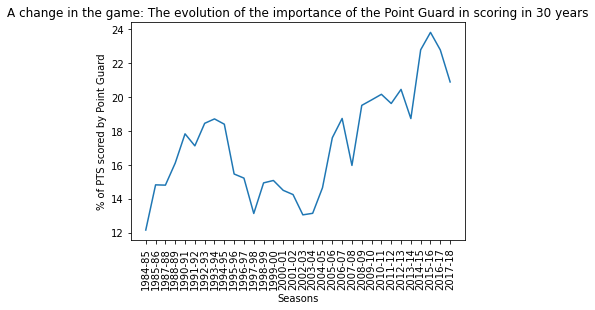

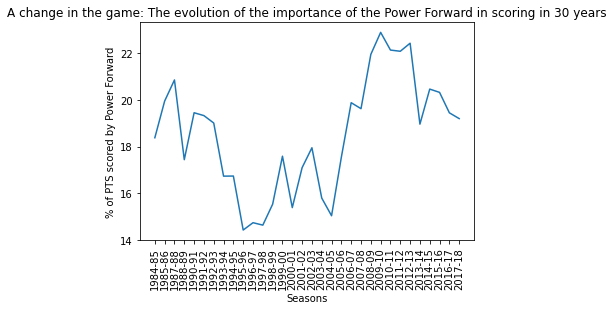

In [61]:
for pos in valid_positions:
    pts_by_position = df.groupby(['YEAR','main_position'])[['PTS_FROM_3P','PTS']].sum()
    #pts['PCT_3P_TOTAL'] = 100 * pts['PTS_FROM_3P'] / pts['PTS']
    pts_by_position.reset_index(inplace=True)
    pts_pg = pts_by_position[pts_by_position['main_position']==pos]
    pts_pg.reset_index(inplace=True)
    timeseries_lst = [pts_pg['YEAR'],pts_pg['PTS'],pts['PTS']]
    pts['PTS'].reset_index()
    pg_total_pts = pd.concat(timeseries_lst,axis=1,keys=['YEAR','PG_PTS','PTS'])
    pg_total_pts['PCT_PG_TOTAL'] = 100 * pg_total_pts['PG_PTS'] / pg_total_pts['PTS']
    pg_total_pts.reset_index(inplace=True)
    plt.plot(pg_total_pts['YEAR'],pg_total_pts['PCT_PG_TOTAL'])
    plt.title(f"A change in the game: The evolution of the importance of the {pos} in scoring in 30 years")
    plt.xlabel("Seasons")
    plt.ylabel(f"% of PTS scored by {pos}")
    plt.xticks(rotation=90)
    plt.show()

In [14]:
plt.plot(pg_total_pts['PCT_PG_TOTAL'])
plt.title(f"A change in the game: The evolution of the importance of the {pos} in scoring in 30 years")
plt.xlabel("Seasons")
plt.ylabel(f"% of PTS scored by {pos}")
plt.xticks(rotation=90)
plt.show()

NameError: name 'pg_total_pts' is not defined